# K-means Clustering: 

K-means clustering is one of the most popular unsupervised machine learning algorithms for grouping data into clusters. Let me walk you through a simple example while explaining how to evaluate its success.

## Required Packages

For this example, we'll use:
- `numpy` for numerical operations
- `sklearn` for the K-means implementation
- `matplotlib` for visualization
- `pandas` for data handling

## Simple K-means Example


In [161]:
# this cell's code is completed

import os
os.environ["OMP_NUM_THREADS"] = "1" 
os.environ["MKL_NUM_THREADS"] = "1"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import seaborn as sns

<b>Load the Iris dataset into 'iris' Set X and Create feature_names

In [163]:
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

**Create a DataFrame for easier data handling and view the 1st 5 rows**

In [165]:
iris_df = pd.DataFrame(X, columns=feature_names)
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


<b>Visualize the scatter plot of sepal length and width

Text(0.5, 1.0, 'Sepal Length vs Sepal Width')

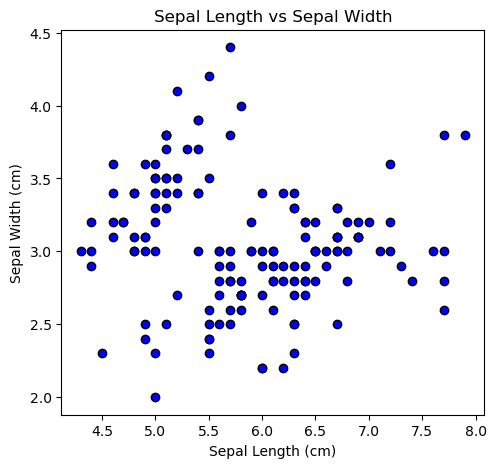

In [167]:
# this cell's code is completed

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c='blue', edgecolors='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')

<b>Visualize the scatter plot of petal length and width

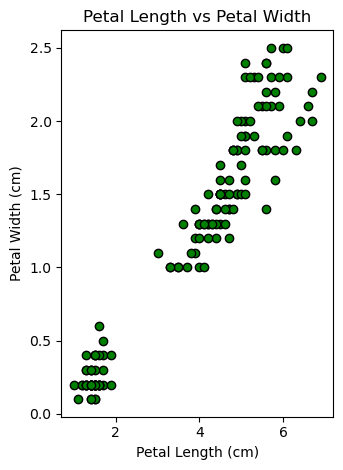

In [169]:
# this cell's code is completed

plt.subplot(1, 2, 2)
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], c='green', edgecolors='k')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')

plt.tight_layout()
plt.show()

<b>Standardize the features (important for K-means)

In [171]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<b>Display the first 5 rows of the normalized data

In [173]:
scaled_df = pd.DataFrame(X_scaled, columns=feature_names)
print("\nFirst 5 rows of the normalized data:")
print(scaled_df.head())


First 5 rows of the normalized data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


<b>Apply K-means clustering (k=3 since we know there are 3 species)

In [175]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)
y_pred = kmeans.labels_

<b>Add cluster labels to the DataFrame

In [177]:
iris_df['cluster'] = y_pred

<b>Visualize the clusters using PCA to reduce to 2 dimensions

In [179]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

<b>Create a DataFrame for the PCA results

In [181]:
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = iris_df['cluster']

In [183]:
# Create visualizations - this cell is complete
plt.figure(figsize=(18, 10))

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<b>Plot 1: PCA visualization by predicted clusters

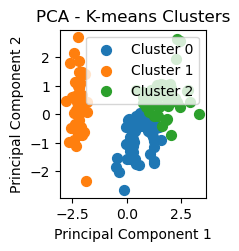

In [185]:
plt.subplot(2, 3, 1)
for cluster_id in range(3):
    subset = pca_df[pca_df['cluster'] == cluster_id]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster_id}', s=50)
plt.title('PCA - K-means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

<b>Plot 2: Pairplot of sepal features with cluster colors

Text(0.5, 1.0, 'Sepal Features by Cluster')

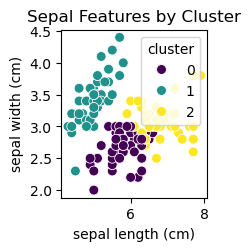

In [187]:
plt.subplot(2, 3, 2)
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)',
                hue='cluster', data=iris_df, palette='viridis', s=50)
plt.title('Sepal Features by Cluster')

<b>Plot 3: Pairplot of petal features with cluster colors

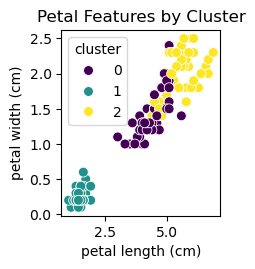

In [189]:
plt.subplot(2, 3, 3)
sns.scatterplot(x='petal length (cm)', y='petal width (cm)',
                hue='cluster', data=iris_df, palette='viridis', s=50)
plt.title('Petal Features by Cluster')

plt.tight_layout()
plt.show()

<b>Calculate cluster centers and interpret them

In [201]:
# Cluster centers
centers = pd.DataFrame(kmeans.cluster_centers_, columns=iris.feature_names)
centers['cluster'] = centers.index

print(centers)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.050220         -0.883376           0.347738          0.281527   
1          -1.014579          0.853263          -1.304987         -1.254893   
2           1.135970          0.088422           0.996155          1.017526   

   cluster  
0        0  
1        1  
2        2  


In [155]:
# Interpretation of cluster centers
# Cluster 0 is probably Iris Versicolor because it has medium petal size and sepal below average.
# Cluster 1 is probably Iris Setosa because it has small petals and wide sepal.
# Cluster 2 is probably Iris Virginica because it has large petals and sepal.

<b>Calculate basic statistics for each cluster

In [203]:
# Calculate basic statistics (mean, min, max, std) for each cluster
cluster_stats = iris_df.groupby('cluster').agg(['mean', 'min', 'max', 'std'])

# Display the statistics
pd.set_option('display.max_columns', None)  # To show all columns in the output
print(cluster_stats)

        sepal length (cm)                     sepal width (cm)            \
                     mean  min  max       std             mean  min  max   
cluster                                                                    
0                5.801887  4.9  6.6  0.405487         2.673585  2.0  3.0   
1                5.006000  4.3  5.8  0.352490         3.428000  2.3  4.4   
2                6.780851  5.9  7.9  0.490624         3.095745  2.5  3.8   

                  petal length (cm)                     petal width (cm)       \
              std              mean  min  max       std             mean  min   
cluster                                                                         
0        0.254310          4.369811  3.0  5.6  0.560420         1.413208  1.0   
1        0.379064          1.462000  1.0  1.9  0.173664         0.246000  0.1   
2        0.262063          5.510638  4.4  6.9  0.638011         1.972340  1.4   

                        
         max       std  
cluste


## Evaluating K-means Success

There are several ways to determine the success of K-means clustering:

1. **Visual Inspection**: Look at the scatter plot to see if the clusters are well-separated and make sense.

2. **Inertia (Within-cluster Sum of Squares)**: This measures how close the data points are to their respective cluster centers. Lower values indicate tighter, better-defined clusters.

3. **Silhouette Score**: Ranges from -1 to 1.
   - Values near 1 indicate well-separated clusters
   - Values near 0 indicate overlapping clusters
   - Negative values suggest data points may be assigned to the wrong clusters

4. **Davies-Bouldin Index**: Measures the average similarity between clusters. Lower values indicate better clustering.

5. **Elbow Method**: Plot inertia against different k values and look for the "elbow" point where adding more clusters doesn't significantly reduce inertia.

6. **Domain Knowledge**: Sometimes the best validation is whether the clusters make sense in your specific context.

Remember that K-means has limitations:
- Assumes clusters are spherical and equally sized
- Sensitive to initial centroid placement
- Requires specifying k in advance
- Can be affected by outliers

For more robust clustering, you might consider alternatives like DBSCAN, Gaussian Mixture Models, or Hierarchical Clustering depending on your data characteristics.


## Interpreting the Results

This example with the Iris dataset demonstrates several important aspects of K-means clustering with real-world data:

1. **Data Preparation**: We standardized the features, which is crucial for K-means since it's sensitive to feature scales.

2. **Evaluation Methods**:
   - **Silhouette Score**: Measures how well-separated the clusters are
   - **Davies-Bouldin Index**: Evaluates cluster separation
   - **Inertia**: Shows how compact the clusters are
   - **Contingency Table**: Compares clusters with known classes (only possible when ground truth is available)

3. **Visualization Techniques**:
   - **PCA**: Reduces dimensionality to visualize high-dimensional data
   - **Elbow Method**: Helps determine the optimal number of clusters
   - **Feature Pairplots**: Shows how clusters separate in different feature spaces

4. **Cluster Interpretation